In [17]:
# importing dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

In [7]:
# Understanding the dataset
boston = load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [9]:
# Acces data attributes
dataset = boston.data
for names,index in enumerate(boston.feature_names):
    print(index, names)

CRIM 0
ZN 1
INDUS 2
CHAS 3
NOX 4
RM 5
AGE 6
DIS 7
RAD 8
TAX 9
PTRATIO 10
B 11
LSTAT 12


In [10]:
# Reshaping the dataset
data = dataset[:,12].reshape(-1,1)

In [12]:
# Shape of the data
np.shape(dataset)

(506, 13)

In [13]:
# Target data
target = boston.target.reshape(-1,1)

In [14]:
# Shape of data
np.shape(target)

(506, 1)

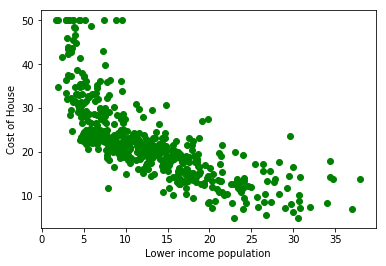

In [16]:
# Plotting data
%matplotlib inline
plt.scatter(data,target,color = "green")
plt.xlabel("Lower income population")
plt.ylabel("Cost of House")
plt.show()

In [18]:
# Performing Regression
reg = LinearRegression()

# Fit the model
reg.fit(data, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
# Predictions
predict = reg.predict(data)

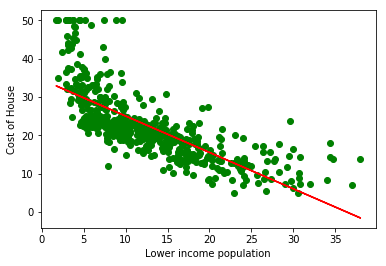

In [21]:
# Regression Line
%matplotlib inline
plt.scatter(data,target,color = "green")
plt.plot(data,predict,color = "red")
plt.xlabel("Lower income population")
plt.ylabel("Cost of House")
plt.show()

In [22]:
# Polynomial model
from sklearn.preprocessing import PolynomialFeatures

# To merge the models
from sklearn.pipeline import make_pipeline

In [23]:
model = make_pipeline(PolynomialFeatures(3), reg)
model.fit(data, target)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [24]:
pred = model.predict(data)

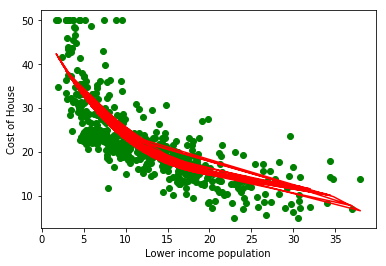

In [26]:
# Regression Line
%matplotlib inline
plt.scatter(data,target,color = "green")
plt.plot(data,pred,color = "red")
plt.xlabel("Lower income population")
plt.ylabel("Cost of House")
plt.show()

In [27]:
# r2 metric to judge performance
from sklearn.metrics import r2_score

In [28]:
# Prediction using r2
r2_score(pred,target)

0.47989118102755735